# Data Visualization And Training Models
## In this notebook the preprocessed data are visualized on charts and ML models are learned. Furthermore model with the best statistic measure (for example accuracy) is picked to save into file.

### 1. Install necessary libraries

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from feature_extraction.feature_extraction import FeatureExtraction
from feature_extraction.utils import PatternCollector
from utils.measure_time import measure_time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from utils.plot_two_cat import PlotTwoCat
from tensorflow.keras import layers
import tensorflow as tf
from matplotlib.container import BarContainer

### 2. Load preprocessed data from files

In [4]:
path_to_phish_data_file = os.path.join('preprocessed_data', 'phish_data.csv')
path_to_non_phish_data_longer = os.path.join('preprocessed_data', 'non_phish_data_longer.csv')
path_to_non_phish_data_shorter = os.path.join('preprocessed_data', 'non_phish_data_shorter.csv')

In [5]:
df1_phish = pd.read_csv(path_to_phish_data_file, index_col='Unnamed: 0', encoding='utf-8')
df1_phish.rename(columns={'PHISH_URL': 'URL'}, inplace=True)

In [6]:
df1_phish.head()

,URL,label
0,https://ollx.1792836.xyz/captcha,1
1,https://ufakick456.com/captcha,1
2,https://keyeseuropean.com/captcha,1
3,https://allegr0lokalnie.83473636.xyz/captcha,1
4,http://ufakick456.com/fb7pl5qw,1


In [7]:
df2_non_phish = pd.read_csv(path_to_non_phish_data_shorter, index_col='Unnamed: 0')
df2_non_phish.rename(columns={'NON_PHISH_URL': 'URL'}, inplace=True)

In [8]:
df2_non_phish.head()

,URL,label
0,https://releases.jquery.com/,0
1,https://code.jquery.com/,0
2,https://app.ether.fi/blocked,0
3,https://efty.com/d/2zfr2/NeonClaims.com/,0
4,https://www.yahoo.com/?&sid=74508,0


In [9]:
df1_phish.shape

(154832, 2)

In [10]:
df2_non_phish.shape

(443531, 2)

In [11]:
df_merged = pd.concat([df1_phish, df2_non_phish])
df_merged

,URL,label
0,https://ollx.1792836.xyz/captcha,1
1,https://ufakick456.com/captcha,1
2,https://keyeseuropean.com/captcha,1
3,https://allegr0lokalnie.83473636.xyz/captcha,1
4,http://ufakick456.com/fb7pl5qw,1
...,...,...
443567,https://imetrica.net/css/,0
443568,https://www.idxband.com/telin/images/e-online.php,0
443569,https://www.coffeewithsophieinc.com/media/syst...,0
443570,https://conseguircreditos.webs.tl/,0


In [12]:
df_merged.shape

(598363, 2)

In [13]:
df_merged.nunique()

URL      598227
label         2
dtype: int64

In [14]:
df_merged[df_merged['URL'].duplicated()]

,URL,label
5654,https://solcold.com/,0
5655,http://solcold.com/,0
5656,https://darkhost.pro:443/,0
5740,https://ciet-itac.ca/fr/user/login,0
5751,http://sistema.gavadent.com/admin/site/login,0
...,...,...
418611,https://webmail.genotec.ch/atmail/compose.php?...,0
422034,https://jaixnchoncolimited.yolasite.com/,0
428467,https://www.fifaonlineligen.com/cms_core/RELAT...,0
428469,https://www.fifaonlineligen.com/cms_core/CTYPE...,0


In [15]:
df_merged['URL'].duplicated().sum()

136

#### Drop duplicates:

In [16]:
df_merged.drop_duplicates(subset=['URL'], inplace=True, keep=False)

In [17]:
df_merged.nunique()

URL      598091
label         2
dtype: int64

In [18]:
df_merged.shape

(598091, 2)

### 3. Take equal number of rows from both DataFrames (in this example by 50.000 from each)

In [19]:
label1_filter = df_merged['label'] == 1
df_urls_1 = df_merged[label1_filter].sample(150_000)

In [20]:
df_urls_1.shape

(150000, 2)

In [21]:
df_urls_1.groupby('label').count()

,URL
label,
1,150000


In [22]:
label0_filter = df_merged['label'] == 0
df_urls_2 = df_merged[label0_filter].sample(150_000)

In [23]:
df_urls_2.shape

(150000, 2)

In [24]:
df_urls_2.groupby('label').count()

,URL
label,
0,150000


#### Merge DataFrames into  frame:

In [25]:
df_urls = pd.concat([df_urls_1, df_urls_2])

In [26]:
df_urls.shape

(300000, 2)

In [27]:
df_urls.groupby('label').count()

,URL
label,
0,150000
1,150000


In [28]:
df_urls.head()

,URL,label
140377,thundercloud.net/activescreens/,1
88905,arretonholidays.co.uk,1
39978,https://reagan-101966.weeblysite.com/,1
93428,http://maciel.med.br/wp-content/plugins/form/,1
16163,https://www.updatein01.com/,1


In [29]:
df_urls.tail()

,URL,label
132381,https://mymodernmet.com/profiles/blogs/intervi...,0
199153,https://pc.gc.ca/eng/lhn-nhs/qc/manoirpapineau...,0
434727,https://jobsforgood.com/us/cgi-bin/webscrdispa...,0
324515,https://answers.yahoo.com/question/index?qid=2...,0
185818,https://winterrosedesigns.blogspot.com/,0


In [30]:
df_urls = df_urls.sample(len(df_urls))

In [31]:
df_urls.head(10)

,URL,label
139871,msdn.microsoft.com/en-us/sqlserver/default.aspx,1
28685,https://cf-ipfs.com/ipfs/QmVuTWtT2VYSHzS5ugRuN...,1
71692,http://www.lyonmediacity.fr/old/wp-content/plu...,1
312882,https://wn.com/film_actor,0
135470,www.s193653721.websitehome.co.uk/logoarts/,1
17934,https://hfboards.com/showthread.php?p=1044686,0
88246,kll988890llllkjhgffr56777878888u.000webhostapp...,1
10899,https://web0mail.hubside.fr/,1
155338,https://mhs86.com/html/sr_pics.asp,0
104574,https://brodylevesque.blogspot.com/2011/11/bro...,0


In [32]:
df_urls.tail(10)

,URL,label
88860,fsi-nsw.com.au,1
94809,https://carleton.ca/cove/cv/Steinberg.htm,0
148646,www.octagonsoftware.com/products/henry/,1
68326,https://travelishard.com/,0
284705,https://http://stackoverflow.com/questions/178...,0
35478,https://pub-9e275d44319e4e58af89f4f87d36a358.r...,1
1214,https://bdv.gbh.mybluehost.me/CH/CHFINAL/30bea/,1
83717,https://soundunwound.com/music/rob-rock/57513,0
328783,https://forum.gon.com/forumdisplay.php?f=72,0
76271,http://vencerelcancer.org/pdf/comite/en-GB/bee...,1


In [33]:
df_urls.shape

(300000, 2)

In [34]:
df_urls.groupby('label').count()

,URL
label,
0,150000
1,150000


#### Checking for nulls:

In [35]:
df_urls['URL'].isnull().sum()

0

In [36]:
df_urls['URL'].isnull().sum()

0

#### Plot distribution of the data:

In [37]:
labels_counts = df_urls['label'].value_counts()
label_desc = labels_counts.index
labels_counts

label
1    150000
0    150000
Name: count, dtype: int64

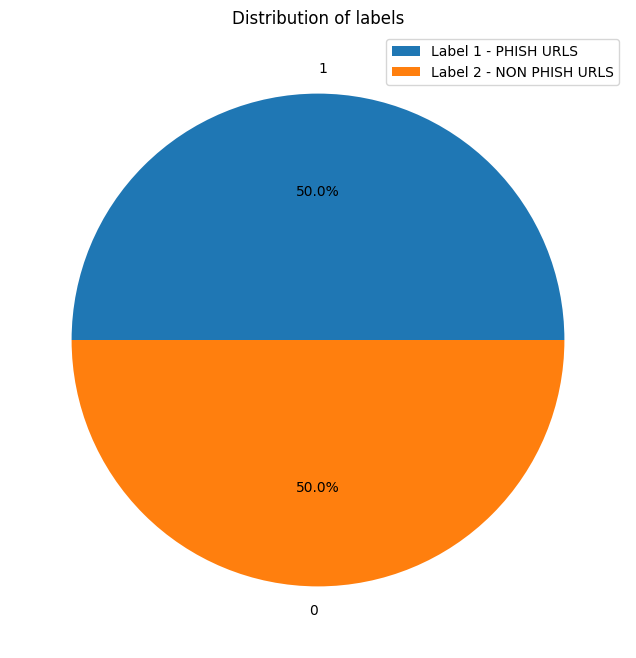

In [38]:
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=label_desc, autopct='%1.1f%%')
plt.title("Distribution of labels")
plt.legend(['Label 1 - PHISH URLS', 'Label 2 - NON PHISH URLS'], loc='upper right')
plt.show()

## 5. Extract features with previously created methods and add them to DataFrame.

### 5.1 Get length of url:

In [39]:
df_urls['URL_LENGTH'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).url_length)

In [40]:
df_urls.head()

,URL,label,URL_LENGTH
139871,msdn.microsoft.com/en-us/sqlserver/default.aspx,1,47
28685,https://cf-ipfs.com/ipfs/QmVuTWtT2VYSHzS5ugRuN...,1,71
71692,http://www.lyonmediacity.fr/old/wp-content/plu...,1,119
312882,https://wn.com/film_actor,0,25
135470,www.s193653721.websitehome.co.uk/logoarts/,1,42


In [41]:
grouped_by_length = df_urls[['URL_LENGTH', 'URL']].groupby(['URL_LENGTH']).count()
grouped_by_length

,URL
URL_LENGTH,
1,1
2,2
4,1
5,4
6,8
...,...
3441,1
3654,1
5795,1


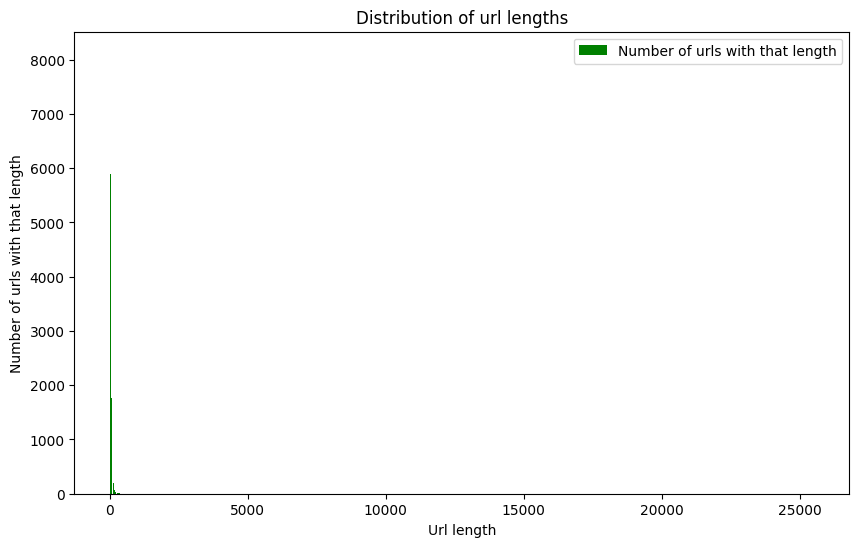

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_length.index, grouped_by_length['URL'], color='green')
plt.title("Distribution of url lengths")
plt.xlabel("Url length")
plt.ylabel("Number of urls with that length")
plt.legend(['Number of urls with that length'], loc='upper right')
plt.show()

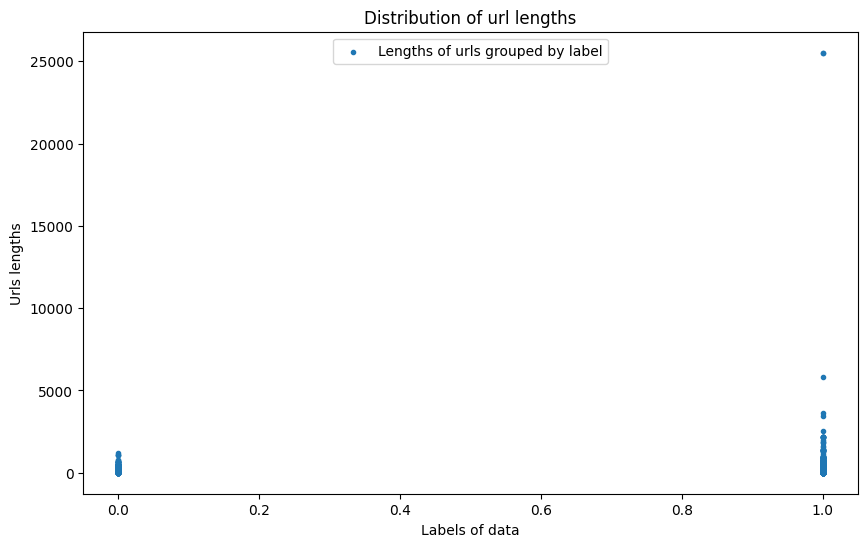

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df_urls['label'], df_urls['URL_LENGTH'], marker='.')
plt.title("Distribution of url lengths")
plt.xlabel("Labels of data")
plt.ylabel("Urls lengths")
plt.legend(['Lengths of urls grouped by label'], loc='upper center')
plt.show()

### 5.2 Check if URL has @ sign:

In [44]:
df_urls['HAVE_@'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_at_sign() else 0)

In [57]:
legitimate_and_have_at_filter = (df_urls['HAVE_@'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_have_at_filter = (df_urls['HAVE_@'] == 0) & (df_urls['label'] == 0)
phish_and_have_at_filter = (df_urls['HAVE_@'] == 1) & (df_urls['label'] == 1)
phish_and_not_have_at_filter = (df_urls['HAVE_@'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_have_at_filter]), len(df_urls[legitimate_and_not_have_at_filter])]
values2 = [len(df_urls[phish_and_have_at_filter]), len(df_urls[phish_and_not_have_at_filter])]

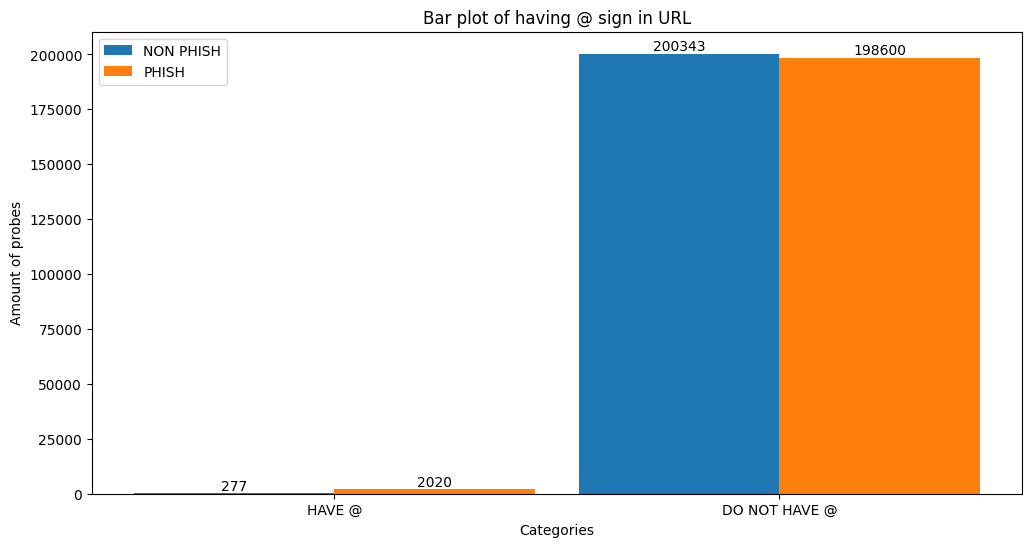

In [58]:
PlotTwoCat(
    positive_cat='HAVE @',
    negative_cat='DO NOT HAVE @',
    title='Bar plot of having @ sign in URL',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()

### 5.3 Check if URL has IP address instead of domain name:

In [59]:
df_urls['HAVE_IP'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_ip_address() else 0)

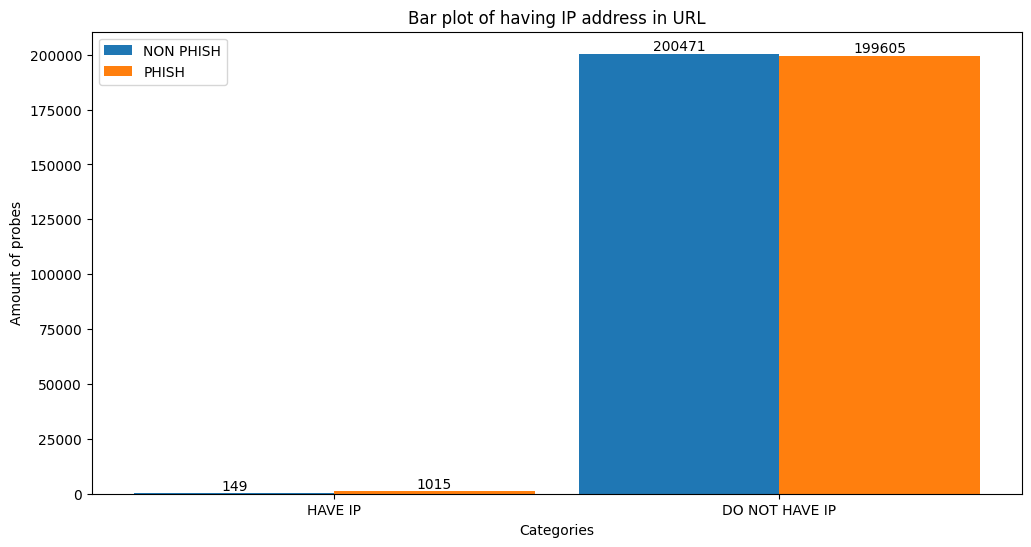

30


In [83]:
# Filter results
legitimate_and_have_ip_filter = (df_urls['HAVE_IP'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_have_ip_filter = (df_urls['HAVE_IP'] == 0) & (df_urls['label'] == 0)
phish_and_have_ip_filter = (df_urls['HAVE_IP'] == 1) & (df_urls['label'] == 1)
phish_and_not_have_ip_filter = (df_urls['HAVE_IP'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_have_ip_filter]), len(df_urls[legitimate_and_not_have_ip_filter])]
values2 = [len(df_urls[phish_and_have_ip_filter]), len(df_urls[phish_and_not_have_ip_filter])]

PlotTwoCat(
    positive_cat='HAVE IP',
    negative_cat='DO NOT HAVE IP',
    title='Bar plot of having IP address in URL',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()


### 5.4 Check if URL is shorter than mean length in set:

In [64]:
mean_url_length = (df_urls['URL'].apply(lambda url: len(url)).sum()/len(df_urls['URL'])).__floor__()
print(f"Mean URL length: {mean_url_length} chars")

Mean URL length: 58 chars


In [65]:
df_urls['LONGER_THAN_MEAN'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).url_longer_than(mean_url_length) else 0)

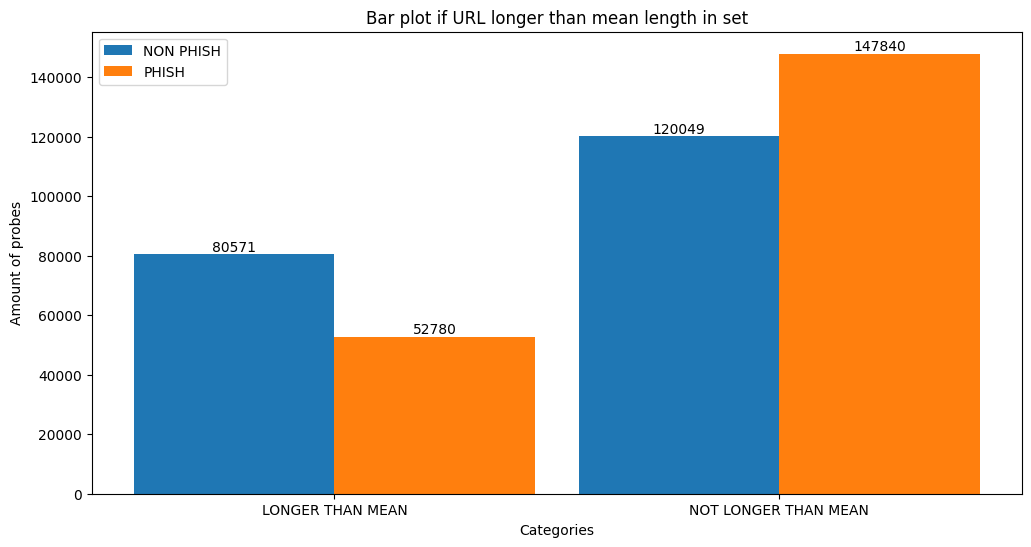

In [66]:
# Filter results
legitimate_and_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 0) & (df_urls['label'] == 0)
phish_and_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 1) & (df_urls['label'] == 1)
phish_and_not_longer_than_mean_filter = (df_urls['LONGER_THAN_MEAN'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_longer_than_mean_filter]), len(df_urls[legitimate_and_not_longer_than_mean_filter])]
values2 = [len(df_urls[phish_and_longer_than_mean_filter]), len(df_urls[phish_and_not_longer_than_mean_filter])]

PlotTwoCat(
    positive_cat='LONGER THAN MEAN',
    negative_cat='NOT LONGER THAN MEAN',
    title='Bar plot if URL longer than mean length in set',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()


### 5.5 Collect chars from URL:

In [69]:
@measure_time
def collect_chars() -> pd.DataFrame:
    chars_df = pd.DataFrame()
    for char in PatternCollector.chars:
        chars_df[char] = pd.DataFrame.from_dict(df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_characters().get(char)))
    return chars_df

In [70]:
df = collect_chars()

Measured running time of collect_chars: 0:02:22.804603


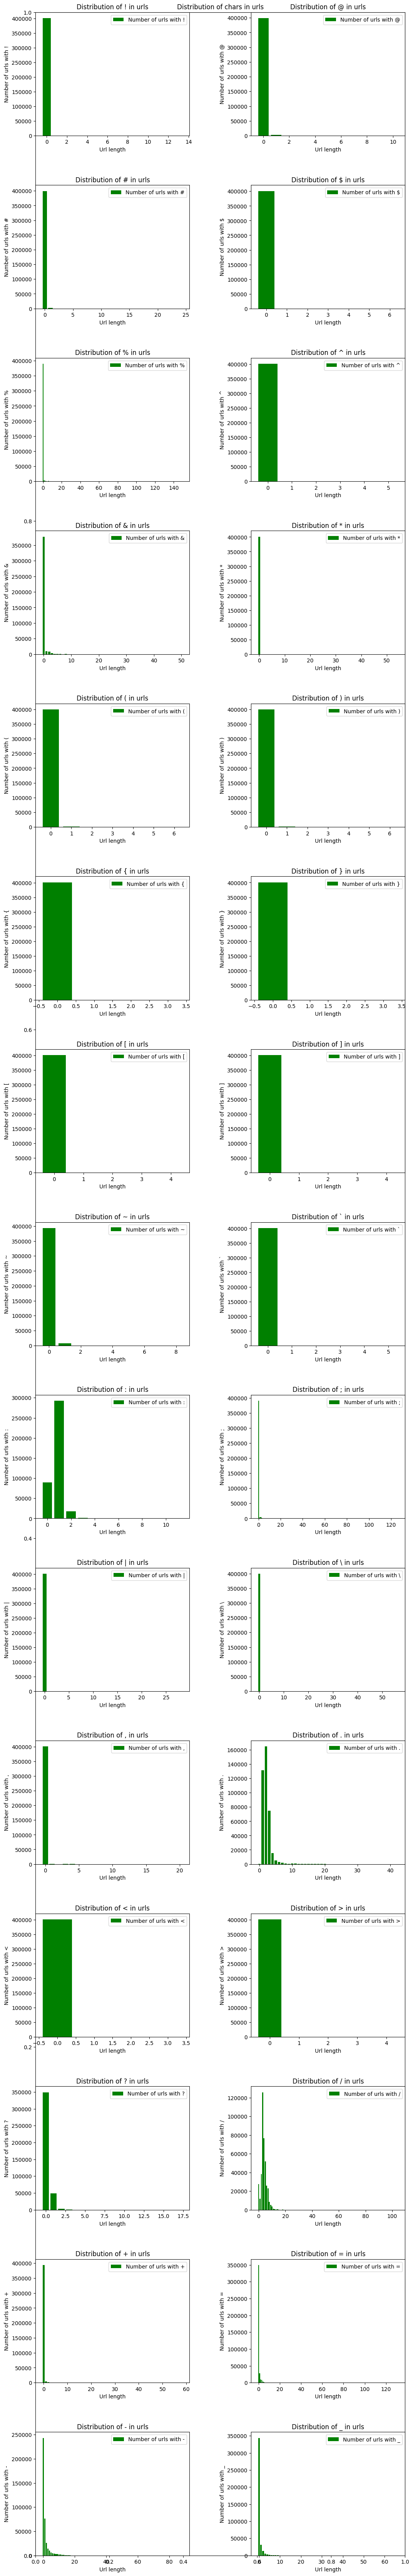

In [101]:

plt.figure(figsize=(12, 60))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
for pos, char in enumerate(PatternCollector.chars):    
    grouped_by_char = df_urls[[char, 'URL']].groupby([char]).count()
    plt.subplot(15, 2, pos+1)
    plt.bar(grouped_by_char.index, grouped_by_char['URL'], color='green', )
    plt.title(f"Distribution of {char} in urls")
    plt.xlabel("Url length")
    plt.ylabel(f"Number of urls with {char}")
    plt.legend([f'Number of urls with {char}'], loc='upper right')

plt.show()

In [129]:
# Count chars and drop that columns in which there are zero chars in any url
for ch in PatternCollector.chars:
    print(f"Number of urls with an once '{ch}': {df_urls[df_urls[char] != 0][ch].count()}")
    zero_chars_in_set = df_urls[df_urls[ch] != 0][ch].count() == 0
    if zero_chars_in_set:
        df_urls = df_urls.drop(ch, axis=1)


Number of urls with an once '!': 57201
Number of urls with an once '@': 57201
Number of urls with an once '#': 57201
Number of urls with an once '$': 57201
Number of urls with an once '%': 57201
Number of urls with an once '^': 57201
Number of urls with an once '&': 57201
Number of urls with an once '*': 57201
Number of urls with an once '(': 57201
Number of urls with an once ')': 57201
Number of urls with an once '{': 57201
Number of urls with an once '}': 57201
Number of urls with an once '[': 57201
Number of urls with an once ']': 57201
Number of urls with an once '~': 57201
Number of urls with an once '`': 57201
Number of urls with an once ':': 57201
Number of urls with an once ';': 57201
Number of urls with an once '|': 57201
Number of urls with an once '\': 57201
Number of urls with an once ',': 57201
Number of urls with an once '.': 57201
Number of urls with an once '<': 57201
Number of urls with an once '>': 57201
Number of urls with an once '?': 57201
Number of urls with an on

In [130]:
df_urls = df_urls.merge(df, on=df_urls.index, how='left')

ValueError: cannot insert key_0, already exists

### 5.6 Check if url has https scheme:

In [131]:
df_urls['HAVE_HTTPS'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_https() else 0)

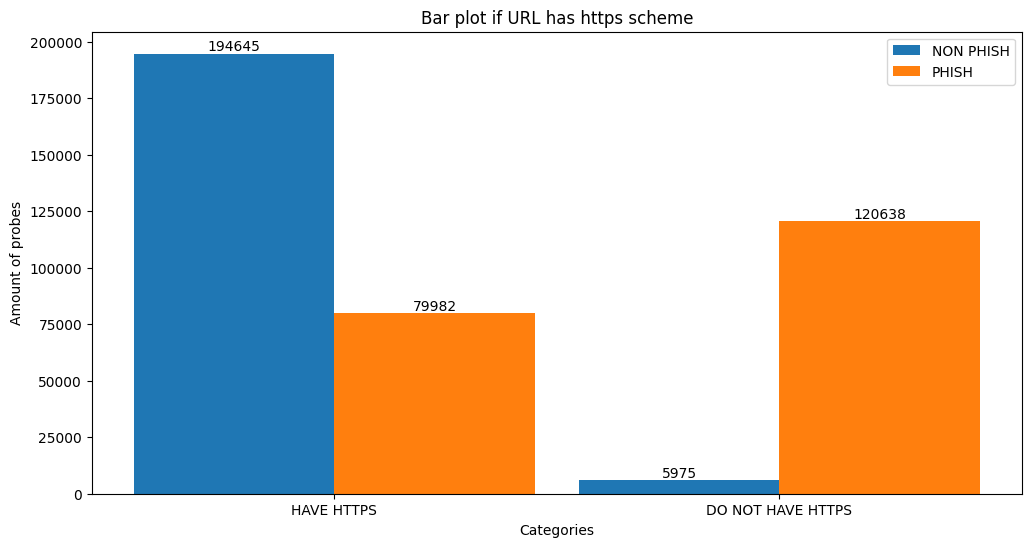

In [132]:
# Filter results
legitimate_and_https_filter = (df_urls['HAVE_HTTPS'] == 1) & (df_urls['label'] == 0)
legitimate_and_not_https_filter = (df_urls['HAVE_HTTPS'] == 0) & (df_urls['label'] == 0)
phish_and_https_filter = (df_urls['HAVE_HTTPS'] == 1) & (df_urls['label'] == 1)
phish_and_not_https_filter = (df_urls['HAVE_HTTPS'] == 0) & (df_urls['label'] == 1)

values1 = [len(df_urls[legitimate_and_https_filter]), len(df_urls[legitimate_and_not_https_filter])]
values2 = [len(df_urls[phish_and_https_filter]), len(df_urls[phish_and_not_https_filter])]

PlotTwoCat(
    positive_cat='HAVE HTTPS',
    negative_cat='DO NOT HAVE HTTPS',
    title='Bar plot if URL has https scheme',
    pos_values=values1,
    neg_values=values2
).plot_by_categories()


In [ ]:
df_urls['ABNORMAL_URL'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).abnormal_url else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['DIGITS_AMOUNT'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_digits())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['LETTERS_AMOUNT'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).count_letters())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['PATH_DEPTH'] =  df_urls['URL'].apply(lambda url: FeatureExtraction(url).path_depth())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['DOTS_IN_NETLOC'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).dots_in_netloc())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['NETLOC_LEN'] = df_urls['URL'].apply(lambda url: FeatureExtraction(url).netloc_length())

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['HAVE_SHORTENING_PATTERNS'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_shortening_patterns() else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls['HAVE_JS_CODE'] = df_urls['URL'].apply(lambda url: 1 if FeatureExtraction(url).have_javascript_code() else 0)

In [ ]:
# TODO: CREATE BAR PLOT FOR THIS DATA

In [ ]:
df_urls

#### Learning Models

In [ ]:
X = df_urls.drop(['key_0', 'URL', 'label'], axis=1)
y = df_urls['label']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [ ]:
# RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize and train the ExtraTreesClassifier
extra_trees_classifier = ExtraTreesClassifier(random_state=42)
extra_trees_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_extra_trees = extra_trees_classifier.predict(X_test)

# Calculate the accuracy of the ExtraTrees model
accuracy_extra_trees = accuracy_score(y_test, y_pred_extra_trees)
print("ExtraTrees Classifier Accuracy:", accuracy_extra_trees)

In [ ]:
import keras
from keras.src.layers import Dense

model = keras.Sequential()
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu', name='l1'))
model.add(Dense(256, activation='relu', name='hidden_layer1'))
model.add(Dense(128, activation='relu', name='hidden_layer2'))
model.add(Dense(64, activation='relu', name='hidden_layer3'))
model.add(Dense(64, activation='relu', name='hidden_layer4'))
model.add(Dense(32, activation='relu', name='hidden_layer5'))
model.add(Dense(1, activation='sigmoid', name='output_layer'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])
model.fit(X_train, y_train, epochs=50, batch_size=64)